D:\escuela\WPy64-31040\python-3.10.4.amd64\lib\site-packages\neurodiffeq\ode.py:260: FutureWarning: The `solve_system` function is deprecated, use a `neurodiffeq.solvers.Solver1D` instance instead
  warnings.warn(


Training Progress:   0%|                                                                      | 0/1000 [00:00<…

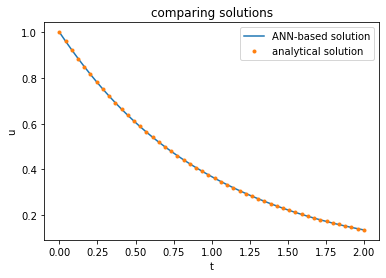

a


In [1]:
from neurodiffeq import diff       # the differentiation operation
from neurodiffeq.ode import solve  # the ANN-based solver
from neurodiffeq.conditions import IVP   # the initial condition
import numpy as np
import matplotlib.pyplot as plt


exponential = lambda u, t: diff(u, t) + u  # specify the ODE
init_val_ex = IVP(t_0=0.0, u_0=1.0)       # specify the initial conditon

# solve the ODE
solution_ex, loss_ex = solve(
    ode=exponential, condition=init_val_ex, t_min=0.0, t_max=2.0
)

ts = np.linspace(0, 2.0, 50)
u_net = solution_ex(ts, to_numpy=True)
u_ana = np.exp(-ts)

plt.figure()
plt.plot(ts, u_net, label='ANN-based solution')
plt.plot(ts, u_ana, '.', label='analytical solution')
plt.ylabel('u')
plt.xlabel('t')
plt.title('comparing solutions')
plt.legend()
plt.show()
print("a")

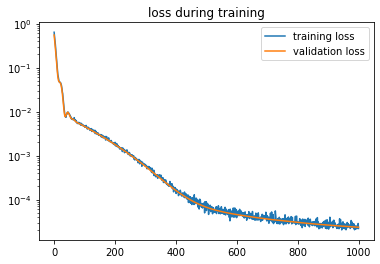

In [2]:
plt.figure()
plt.plot(loss_ex['train_loss'], label='training loss')
plt.plot(loss_ex['valid_loss'], label='validation loss')
plt.yscale('log')
plt.title('loss during training')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


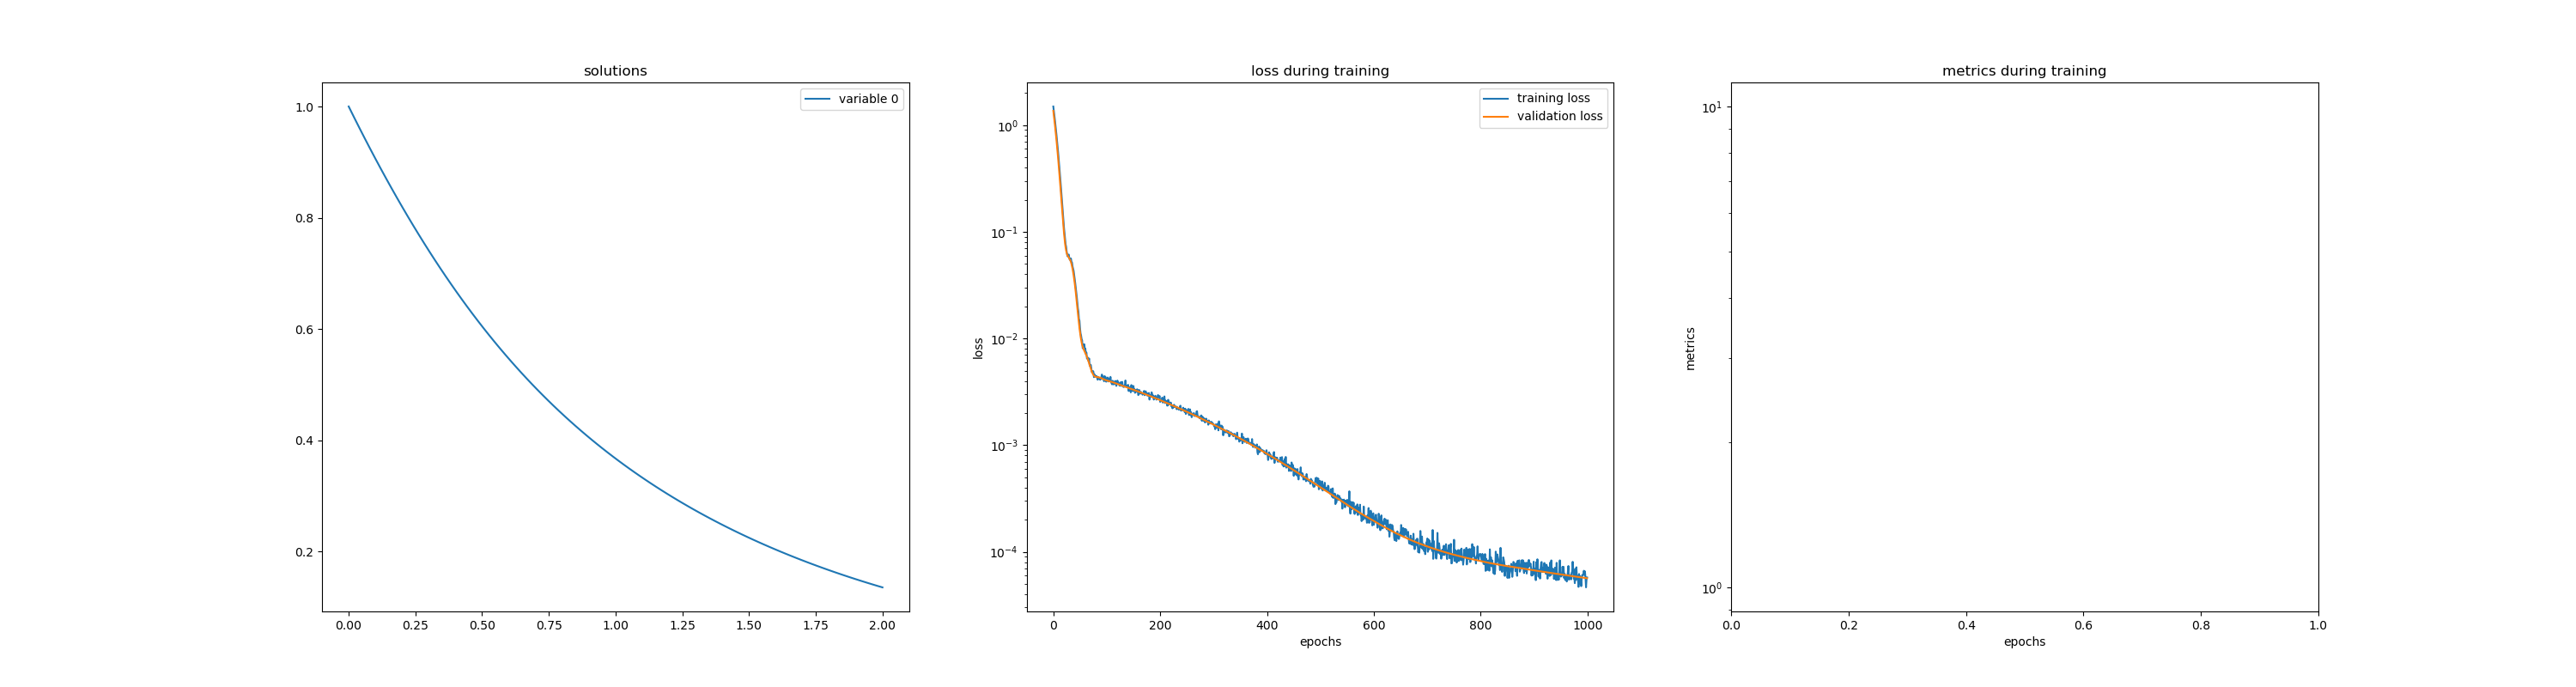

D:\escuela\WPy64-31040\python-3.10.4.amd64\lib\site-packages\neurodiffeq\ode.py:260: FutureWarning: The `solve_system` function is deprecated, use a `neurodiffeq.solvers.Solver1D` instance instead
  warnings.warn(
D:\escuela\WPy64-31040\python-3.10.4.amd64\lib\site-packages\neurodiffeq\solvers.py:438: UserWarning: Passing `monitor` is deprecated, use a MonitorCallback and pass a list of callbacks instead
  warnings.warn("Passing `monitor` is deprecated, "


Training Progress:   0%|                                                                      | 0/1000 [00:00<…

In [3]:
from neurodiffeq.monitors import Monitor1D
# This must be executed for Jupyter Notebook environments
# If you are using Jupyter Lab, try `%matplotlib widget`
# Don't use `%matplotlib inline`!

%matplotlib notebook

solution_ex, _ = solve(
    ode=exponential, condition=init_val_ex, t_min=0.0, t_max=2.0,
    monitor=Monitor1D(t_min=0.0, t_max=2.0, check_every=100)
)
